This is an introduction to linear regression (using Python).

**Linear Regression** is a fundamental algorithm in machine learning that predicts a target variable by fitting the best linear relationship between the dependent and independent variable (or variables).

**Residual** The best fit line is calculated by minimizing the residual. The residual is the distance between the actual y and the predicted y.

**The equation** of the linear regression model is: 

$Y = mX + c$

- $Y$ is the dependent variable (output/outcome/prediction/estimation)
- $X$ is the independent variable (input/cause)
- $m$ is the slope of the regression line (rate of change of $Y$ as $X$ increases)
- $c$ is the y-intercept of the regression line (value of $Y$ when $X$ is $0$)

**Implementation** - We'll use the `sklearn.linear_model.LinearRegression` class from the `scikit-learn` library to perform linear regression.

## Example: 1 feature vector (without noise)
Here is a basic example:

In this script we:
1. Import the required libraries
2. Create a simple dataset. 
3. Split our dataset into training and test sets, 80% of the data will be used for training the model and 20% of the data will be used for testing.
4. Train our algorithm using the training data and the linear regression model from the sklearn library. 
5. Use our trained algorithm to predict the output of our test data. 
6. Check the accuracy of our algorithm by calculating the mean squared error.
7. Plot the best fit line (model prediction) against the test data to visualize our prediction.

In [2]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

In [3]:
# Let's create some simple dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape((-1, 1))
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Train the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

In [7]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [2.]


In [8]:
# The mean squared error
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 0.00


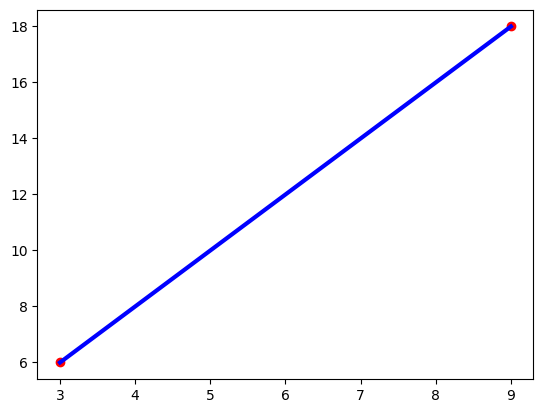

In [9]:
# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

## Example: 1 feature vector with added noise

In [10]:
import sklearn as sk

In [11]:
# set a random seed for sklearn
# this is to make the results reproducible
# for the purpose of this tutorial
# sklearn uses numpy's random number generator, source: https://stackoverflow.com/a/31058798/10006823
import numpy as np
np.random.seed(0)


In [12]:
# create random data for a linear regression problem using numpy random number generator with some noise:
# fix the seed
np.random.seed(0)
# parameters for data generation
# feature 1: x values parameters:
number_of_data_instances = 50
min_x = 1000
max_x = 3000
# target: y values parameters:
slope = 200
intercept = 100000
noise_standard_deviation = 30000

#generate the feature values (x values):
X = np.random.rand(number_of_data_instances, 1) * (max_x - min_x) + min_x
# generate the target values (y values) with Gaussian noise:
y = slope * X + intercept + noise_standard_deviation*np.random.randn(number_of_data_instances,1)

In [13]:
xlabel="Feature 1: House Size (square feet)"
ylabel="Target: House Price (dollars)"

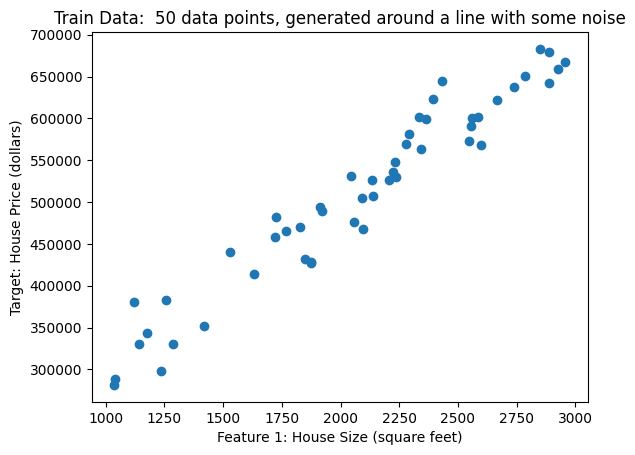

In [14]:
# plot the data
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Train Data:  {number_of_data_instances} data points, generated around a line with some noise")
plt.show()

In [15]:
# run a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

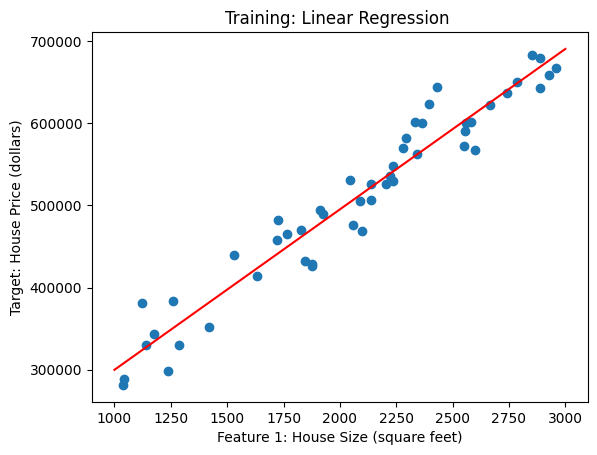

In [16]:
# plot the line
x = np.linspace(min_x, max_x, 2)
m = model.coef_[0]
b = model.intercept_
plt.plot(x, m*x + b, c='r')
# plot the data
plt.scatter(X, y)
# add x and y labels, and a title
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Training: Linear Regression ")
plt.show()

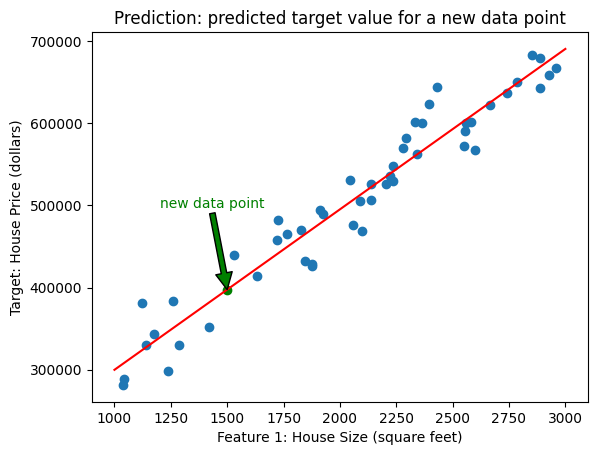

In [17]:
# plot the line
x = np.linspace(min_x, max_x, 2)
m = model.coef_[0]
b = model.intercept_
plt.plot(x, m*x + b, c='r')
# plot the data
plt.scatter(X, y)
# add x and y labels, and a title
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Prediction: predicted target value for a new data point")
# add a new data point
plt.scatter(1500, m*1500 + b, c='g')
# add an arrow annotation indicating the new data point
plt.annotate('new data point', xy=(1500, m*1500 + b), xytext=(1200, m*1500 + b + 100000), color='green', arrowprops=dict(facecolor='green'))
plt.show()

## Example: 2 feature vectors with added noise 
Here's a simple example of linear regression in Python using `sklearn.linear_model.LinearRegression`, this time with two feature vectors. We'll generate some synthetic data for the purposes of this demonstration:

In this example, we generate a 100x2 matrix `X` for our features, and a vector `y` for our targets. The true relationship is `y = 1.5*x1 + 2.5*x2 + noise`, where `x1` and `x2` are the two features, and `noise` is some Gaussian noise to make the problem a bit more realistic. We then fit a linear regression model to this data and print the estimated coefficients. If everything went well, the coefficients should be close to 1.5 and 2.5, and the intercept close to 0.

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)  # Set seed for reproducibility
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = 1.5 * X[:, 0] + 2.5 * X[:, 1] + np.random.randn(100)  # True relation: y = 1.5*x1 + 2.5*x2 + noise

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [1.07370044 2.52957506]
Intercept: 0.11450325561777852


The code to plot the data points and the regression plane (since we are dealing with two features, the fit will be a plane in 3D space, not a line) is more complex than for one feature. Here is a simple code using `matplotlib` to visualize the original data points and the fitted plane.

This code creates a 3D scatter plot of the original data points and a surface plot for the fitted linear regression model. The true data points are in blue, and the fitted surface is in red.

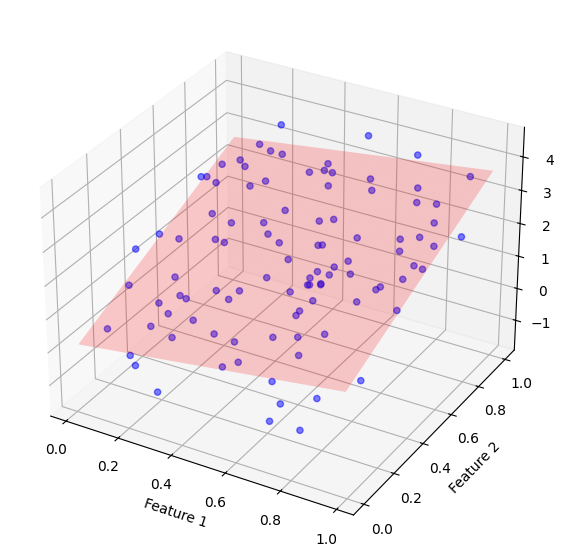

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a coordinate grid
x1 = np.linspace(X[:,0].min(), X[:,0].max(), num=10)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), num=10)
x1, x2 = np.meshgrid(x1, x2)

# Compute corresponding y values
y_pred = model.intercept_ + model.coef_[0] * x1 + model.coef_[1] * x2

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='blue', marker='o', alpha=0.5)
ax.plot_surface(x1, x2, y_pred, color='red', alpha=0.2)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

In [20]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=y,
    labels={'x': 'Feature 1', 'y': 'Feature 2', 'z': 'Target'}
)


# Create a surface plot
surface = go.Surface(x=x1, y=x2, z=y_pred, colorscale='Reds', opacity=0.2, showscale=False)

fig.add_trace(surface)

fig.show()